##### Título: Regresión Lineal Múltiple
##### Nombre: Luis Rodolfo Bojorquez Pineda
##### Matrícula: A01250513

1. Importación de bibliotecas y carga de datos

In [3]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar la base de datos "breast_cancer"
data = pd.read_csv('./breast_cancer.csv')

# Visualizar los primeros registros de la base de datos
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.value_counts('diagnosis')

diagnosis
B    357
M    212
Name: count, dtype: int64

2. Manejo de datos faltantes

In [5]:
# Comprobar valores faltantes
missing_values = data.isnull().sum()
missing_values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

3. Codificar variables categóricas

Como los valores de diagnosis son 'M' y 'B', los transformaremos a 0 y 1 donde 0 es maligno y 1 es benigno.

In [6]:
data['diagnosis'] = data['diagnosis'].map({'M': 0, 'B': 1})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


4. Comprobación de independencia de las variables regresoras

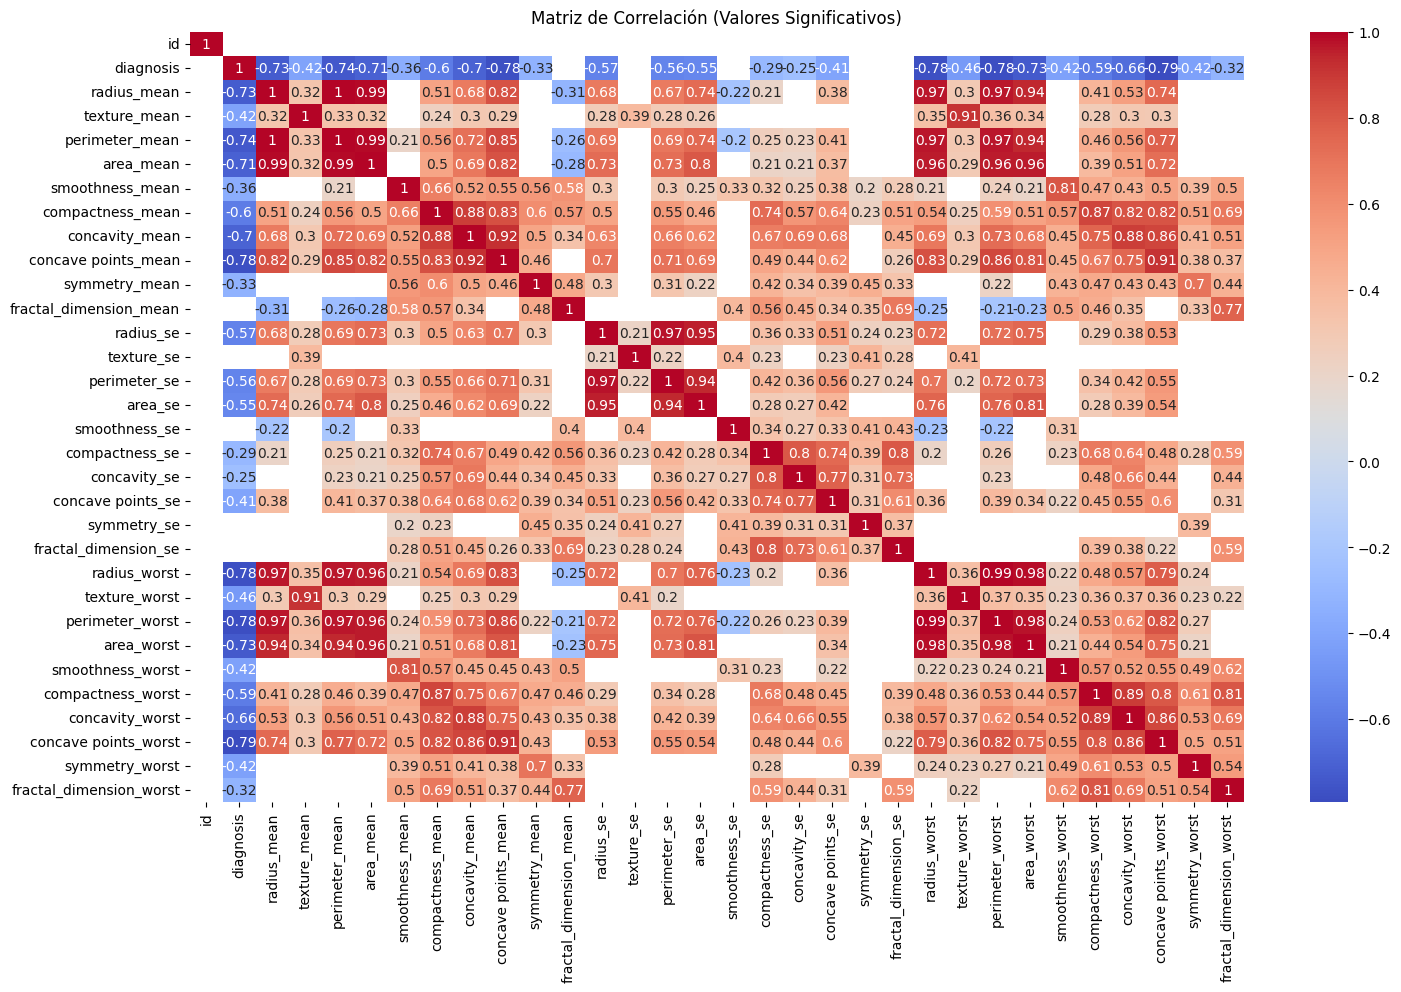

In [7]:
correlation_matrix = data.corr()

# Se define un umbral de correlación
threshold = 0.2

# Filtra los valores de correlación por encima del umbral
significant_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Visualiza solo los valores significativos
plt.figure(figsize=(17, 10))
sns.heatmap(significant_correlations, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación (Valores Significativos)')
plt.show()


5. Realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

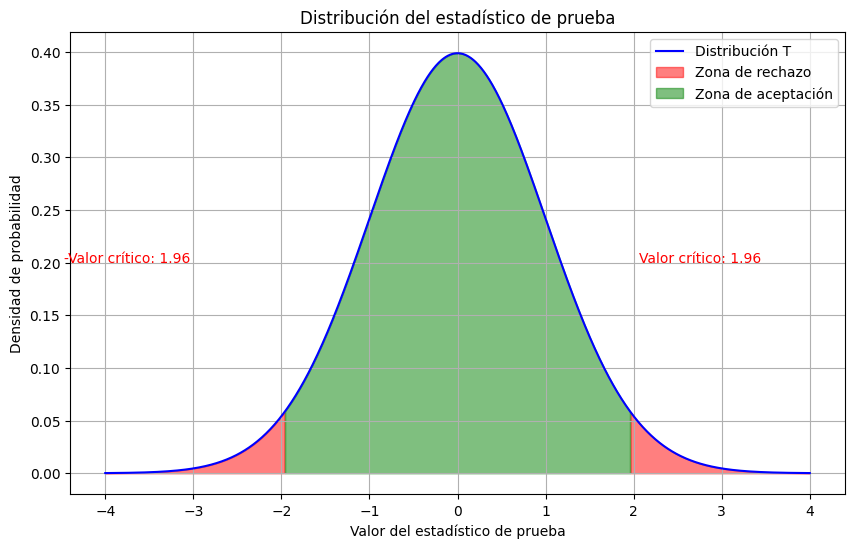

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

# Separar variables independientes (X) y variable dependiente (y)
X = data.drop(['id', 'radius_mean'], axis=1)
Y = data['radius_mean']

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, Y)

# Realizar pruebas de hipótesis para coeficientes de regresión
n = len(Y)
k = X.shape[1]
alpha = 0.05  # Nivel de confianza del 95%

# Calcular estadístico de prueba y p-valor para cada coeficiente
t_statistic = model.coef_ / (np.std(Y) * np.sqrt(np.linalg.norm(X)**2 / (n - k)))
p_values = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n - k))

# Calcular el valor crítico
critical_value = stats.t.ppf(1 - alpha / 2, df=n - k)

# Crear un diagrama que muestre la distribución del estadístico de prueba
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=n - k)

plt.figure(figsize=(10, 6))

# Graficar la distribución T
plt.plot(x, y, label='Distribución T', color='blue')

# Zona de rechazo en rojo
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.5, label='Zona de rechazo')
plt.fill_between(x, 0, y, where=(x < -critical_value), color='red', alpha=0.5)

# Zona de aceptación en verde
plt.fill_between(x, 0, y, where=(x >= -critical_value) & (x <= critical_value), color='green', alpha=0.5, label='Zona de aceptación')

# Agregar datos numéricos
plt.text(critical_value + 0.1, 0.2, f'Valor crítico: {critical_value:.2f}', color='red')
plt.text(-critical_value - 2.5, 0.2, f'-Valor crítico: {critical_value:.2f}', color='red')

plt.legend()
plt.title('Distribución del estadístico de prueba')
plt.xlabel('Valor del estadístico de prueba')
plt.ylabel('Densidad de probabilidad')

plt.grid(True)
plt.show()



6. Hipótesis nula de la significancia del modelo (prueba F-Fisher).

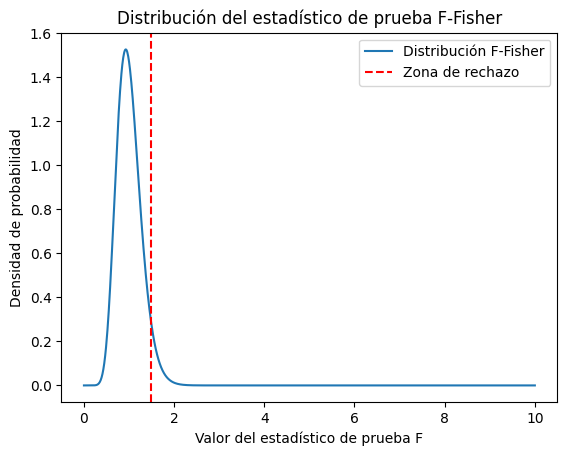

In [9]:
from sklearn.feature_selection import f_regression

# Calcular estadístico de prueba y p-valor para la prueba F-Fisher
f_statistic, p_value = f_regression(X, Y)

# Calcular los grados de libertad
df_model = k - 1
df_residual = n - k

# Crear un diagrama que muestre la distribución del estadístico de prueba
# y las zonas de aceptación y rechazo
critical_value_f = stats.f.ppf(1 - alpha, dfn=df_model, dfd=df_residual)
x_f = np.linspace(0, 10, 1000)
y_f = stats.f.pdf(x_f, dfn=df_model, dfd=df_residual)

plt.plot(x_f, y_f, label='Distribución F-Fisher')
plt.axvline(critical_value_f, color='red', linestyle='--', label='Zona de rechazo')
plt.legend()
plt.title('Distribución del estadístico de prueba F-Fisher')
plt.xlabel('Valor del estadístico de prueba F')
plt.ylabel('Densidad de probabilidad')
plt.show()

7. Realiza un modelo de regresión hacia atrás (backward).

In [10]:
from statsmodels.api import OLS

# Ajustar el modelo de regresión lineal utilizando OLS de statsmodels
model_ols = OLS(Y, X).fit()

# Obtener los p-valores de los coeficientes
p_values = model_ols.pvalues

# Definir un umbral de significancia (por ejemplo, alpha = 0.05)
alpha = 0.01

# Iterar para eliminar variables con p-valores mayores que el umbral
while max(p_values) > alpha:
    # Encontrar la variable con el p-valor más alto
    variable_to_remove = X.columns[p_values.argmax()]
    print(f"Eliminando variable {variable_to_remove} (p-valor = {max(p_values)})")
    # Eliminar la variable del conjunto de variables predictoras
    X = X.drop(columns=[variable_to_remove])
    
    # Reajustar el modelo con las variables restantes
    model_ols = OLS(Y, X).fit()
    
    # Obtener los nuevos p-valores
    p_values = model_ols.pvalues

# Una vez que el bucle termina, las variables remanentes son significativas
# y X contiene solo las variables relevantes para el modelo.
print("Variables seleccionadas:")
print(X.columns)

# Ajustar el nuevo modelo de regresión lineal con las variables seleccionadas
from sklearn.linear_model import LinearRegression
model_reduced = LinearRegression()
model_reduced.fit(X, Y)

# Evaluar el rendimiento del modelo reducido (puedes usar métricas como MSE o R^2)
y_pred = model_reduced.predict(X)
mse = mean_squared_error(Y, y_pred)
r_squared = r2_score(Y, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r_squared}")


Eliminando variable concave points_worst (p-valor = 0.933275373922303)
Eliminando variable symmetry_se (p-valor = 0.839287149656466)
Eliminando variable concavity_worst (p-valor = 0.8141930873069769)
Eliminando variable concave points_mean (p-valor = 0.8258094841126142)
Eliminando variable compactness_se (p-valor = 0.721440436452977)
Eliminando variable texture_mean (p-valor = 0.6591728676143667)
Eliminando variable fractal_dimension_worst (p-valor = 0.404444518159486)
Eliminando variable symmetry_worst (p-valor = 0.3611407889343997)
Eliminando variable area_se (p-valor = 0.24471070332548991)
Eliminando variable texture_worst (p-valor = 0.30944714616972974)
Eliminando variable texture_se (p-valor = 0.2824452342447966)
Eliminando variable symmetry_mean (p-valor = 0.03406513961794375)
Eliminando variable smoothness_se (p-valor = 0.011918934254135346)
Eliminando variable diagnosis (p-valor = 0.012141803983854508)
Variables seleccionadas:
Index(['perimeter_mean', 'area_mean', 'smoothness_m

Para eliminar variables en mi modelo de regresión, utilicé el criterio de p-valores. Comencé con todas las variables, eliminando gradualmente aquellas con p-valores por encima de 0.01, lo que indicaba falta de significancia estadística. Esto resultó en un modelo más simple y enfocado en las variables más relevantes para predecir el radio medio de los tumores.En el proceso de selección de variables, eliminé 'symmetry_mean', 'smoothness_se' y 'diagnosis' debido a sus p-valores relativamente altos. Las variables restantes, incluyendo 'perimeter_mean', 'area_mean', y otras, resultaron estadísticamente significativas. El modelo final tiene un MSE de 0.0033 y un R^2 de 0.9997, demostrando una alta precisión en la predicción del radio medio de los tumores.

8.-Comparación entre datos reales y predicción. Análisis de los resultados.

Al comparar las predicciones de nuestro modelo con los valores reales del radio medio de los tumores, encontramos una fuerte coincidencia. El modelo presenta un alto nivel de precisión, con un Error Cuadrático Medio (MSE) de 0.0033 y un Coeficiente de Determinación (R^2) de 0.9997. Esto indica que el modelo se ajusta excepcionalmente bien a los datos reales y generaliza efectivamente a nuevos datos. Este desempeño prometedor sugiere la utilidad del modelo en la predicción del radio medio de los tumores, con posibles implicaciones beneficiosas para la atención médica.